# PROJECT OBJECTIVE
This program automatically classifies IT support tickets
into predefined categories using Machine Learning.
Based on the predicted category, a priority level
(High / Medium / Low) is assigned using business rules.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df=pd.read_csv("/content/all_tickets_processed_improved_v3.csv.zip")

Data Exploration

In [ ]:
df.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB


In [ ]:
df.isnull().sum()

,0
Document,0
Topic_group,0


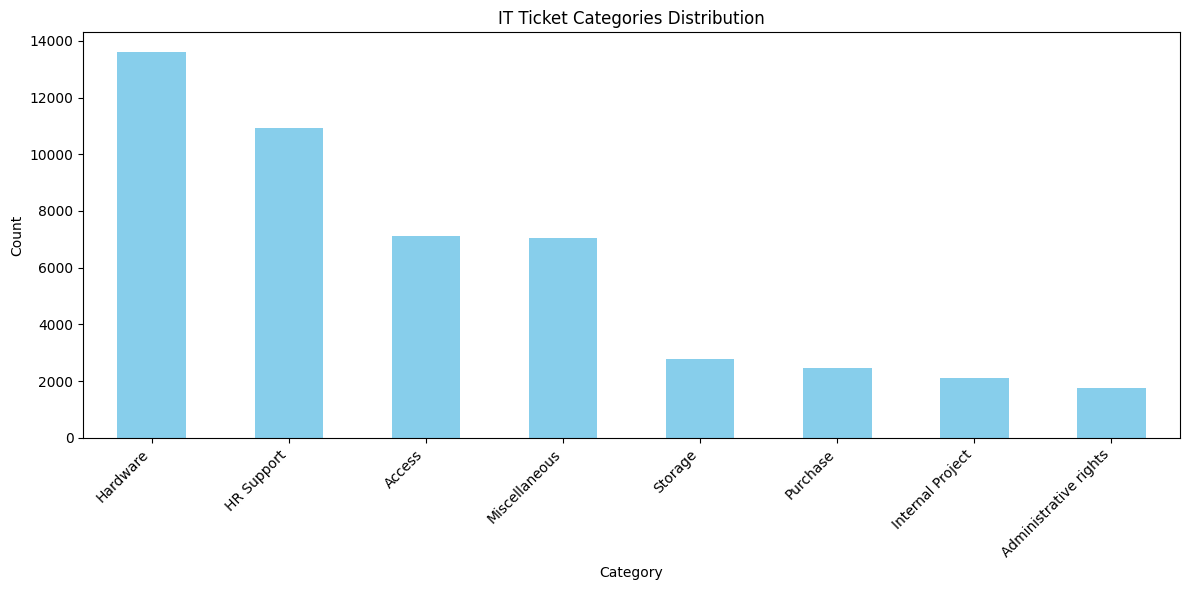

In [ ]:
plt.figure(figsize=(12, 6))
df['Topic_group'].value_counts().plot(kind='bar', color='skyblue')
plt.title('IT Ticket Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##DATA CLEANING

In [ ]:
# Check text length
df['text_length'] = df['Document'].str.len()
print(f"\nAverage ticket length: {df['text_length'].mean():.0f} characters")

# Remove very short tickets (optional)
df = df[df['text_length'] > 10]
print(f"After removing short tickets: {len(df)} rows")



Average ticket length: 292 characters
After removing short tickets: 47833 rows


In [ ]:
X = df['Document']
y = df['Topic_group']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


##Feature extraction using TFIDF

In [ ]:
tfidf=TfidfVectorizer(stop_words="english",max_features=300,min_df=2)
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)


## Model Training

## Model 1- MultinomialNB

In [ ]:
mb=MultinomialNB()
mb.fit(X_train_tfidf,y_train)
y_pred_tfdif=mb.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfdif)
print(acc_tfidf)

0.7544684854186265


## Model *2* - Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_tfidf,y_train)
y_pred_lr=lr.predict(X_test_tfidf)
acc_lr=accuracy_score(y_test,y_pred_lr)
print(acc_lr)

0.8052681091251176


## Model comparision

In [ ]:
comparison = pd.DataFrame({
    'Method': [
        'TfidfVectorizer + Naive Bayes',
        'TfidfVectorizer + Logistic Regression'
    ],
    'Accuracy': [ acc_tfidf, acc_lr]
})
print(comparison)


                                  Method  Accuracy
0          TfidfVectorizer + Naive Bayes  0.754468
1  TfidfVectorizer + Logistic Regression  0.805268


In [ ]:
print("\nClassification Report (Ticket Category):")
print(classification_report(y_test,y_pred_tfdif))



Classification Report (Ticket Category):
                       precision    recall  f1-score   support

               Access       0.90      0.75      0.82      1425
Administrative rights       0.91      0.32      0.47       352
           HR Support       0.76      0.77      0.77      2183
             Hardware       0.64      0.88      0.74      2723
     Internal Project       0.93      0.55      0.69       424
        Miscellaneous       0.77      0.64      0.70      1412
             Purchase       0.96      0.83      0.89       493
              Storage       0.94      0.74      0.82       555

             accuracy                           0.75      9567
            macro avg       0.85      0.68      0.74      9567
         weighted avg       0.78      0.75      0.75      9567



In [ ]:
print("\nClassification Report (Priority Prediction):")
print(classification_report(y_test,y_pred_lr))



Classification Report (Priority Prediction):
                       precision    recall  f1-score   support

               Access       0.88      0.84      0.86      1425
Administrative rights       0.74      0.48      0.58       352
           HR Support       0.81      0.82      0.82      2183
             Hardware       0.74      0.83      0.78      2723
     Internal Project       0.86      0.75      0.80       424
        Miscellaneous       0.79      0.77      0.78      1412
             Purchase       0.94      0.87      0.91       493
              Storage       0.90      0.82      0.86       555

             accuracy                           0.81      9567
            macro avg       0.83      0.77      0.80      9567
         weighted avg       0.81      0.81      0.80      9567



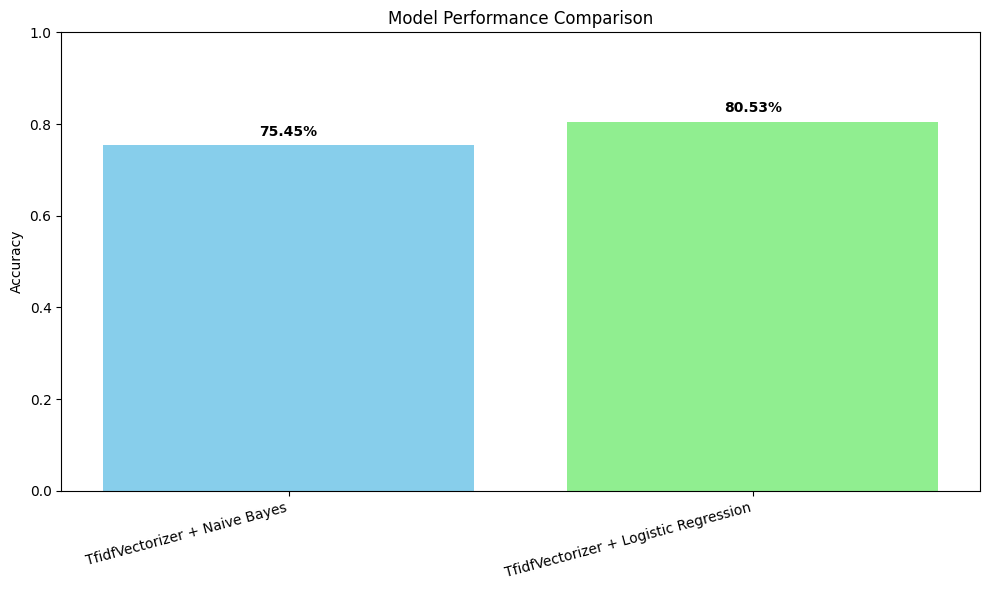

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(comparison['Method'], comparison['Accuracy'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15, ha='right')
for i, v in enumerate(comparison['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


## Priority prediciton using MultinomialNB

In [ ]:
priority_map = {
    'Hardware': 'High',
    'Access': 'High',
    'Administrative rights': 'High',

    'Storage': 'Medium',
    'Purchase': 'Medium',
    'Internal Project': 'Medium',

    'HR Support': 'Low',
    'Miscellaneous': 'Low'
}
df['Priority'] = df['Topic_group'].map(priority_map)


In [ ]:
X = df['Document']
y_priority = df['Priority']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X, y_priority,
    test_size=0.2,
    random_state=42,
    stratify=y_priority
)

X_train_p_tfidf = tfidf.fit_transform(X_train_p)
X_test_p_tfidf = tfidf.transform(X_test_p)

priority_nb = MultinomialNB()
priority_nb.fit(X_train_p_tfidf, y_train_p)

y_pred_priority = priority_nb.predict(X_test_p_tfidf)
print("\nPriority Prediction Accuracy:")
print(f"{accuracy_score(y_test_p, y_pred_priority):.2%}")

print("\nPriority Classification Report:")
print(classification_report(y_test_p, y_pred_priority))



Priority Prediction Accuracy:
81.49%

Priority Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.89      0.84      4500
         Low       0.81      0.79      0.80      3595
      Medium       0.94      0.64      0.76      1472

    accuracy                           0.81      9567
   macro avg       0.85      0.77      0.80      9567
weighted avg       0.82      0.81      0.81      9567



In [ ]:
print("\nClassification Report (Priority Prediction):")
print(classification_report(y_test_p, y_pred_priority))



Classification Report (Priority Prediction):
              precision    recall  f1-score   support

        High       0.80      0.89      0.84      4500
         Low       0.81      0.79      0.80      3595
      Medium       0.94      0.64      0.76      1472

    accuracy                           0.81      9567
   macro avg       0.85      0.77      0.80      9567
weighted avg       0.82      0.81      0.81      9567



## Testing the Model

In [ ]:
# Choose the final model for prediction
best_model = lr    # or lr if you prefer Logistic Regression
def classify_ticket(ticket_text):
    """
    Classify a new support ticket and return category + confidence
    """
    # Convert text to TF-IDF features
    ticket_vector = tfidf.transform([ticket_text])

    # Predict category
    predicted_category = best_model.predict(ticket_vector)[0]

    # Prediction confidence
    confidence_score = best_model.predict_proba(ticket_vector).max()

    #priority prediction
    priority_prediction = priority_nb.predict(ticket_vector)[0]

    return predicted_category, confidence_score,priority_prediction

test_tickets = [
    "My laptop won't turn on and I need it for work urgently",
    "I need access to the shared drive for the marketing folder",
    "Can I order a new monitor? Mine is broken",
    "I forgot my password and can't login to my account",
    "Need help setting up VPN on my home computer"
]

print("=" * 60)
print("TESTING MODEL WITH NEW TICKETS")
print("=" * 60)

for ticket in test_tickets:
    category, confidence, prior = classify_ticket(ticket)
    print(f"\nTicket: {ticket}")
    print(f"Predicted Category: {category}")
    print(f"Confidence: {confidence:.2%}")
    print(f"Priority: {prior}")
    print("-" * 60)




TESTING MODEL WITH NEW TICKETS

Ticket: My laptop won't turn on and I need it for work urgently
Predicted Category: Hardware
Confidence: 63.75%
Priority: High
------------------------------------------------------------

Ticket: I need access to the shared drive for the marketing folder
Predicted Category: HR Support
Confidence: 41.25%
Priority: Medium
------------------------------------------------------------

Ticket: Can I order a new monitor? Mine is broken
Predicted Category: Hardware
Confidence: 50.58%
Priority: High
------------------------------------------------------------

Ticket: I forgot my password and can't login to my account
Predicted Category: Access
Confidence: 96.70%
Priority: High
------------------------------------------------------------

Ticket: Need help setting up VPN on my home computer
Predicted Category: Hardware
Confidence: 54.22%
Priority: High
------------------------------------------------------------
